In [86]:
import requests
import json
import datetime as dt
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot as plt
import urllib
from IPython.display import SVG
from bs4 import BeautifulSoup
import numpy as np

In [62]:
api_key = 'eKAU88ywcaQZ6AN9odq5yUGUHOywAAXqCe7f8HAp9O3+gugvxXeJhmxpiL7DYaLUvW+K88ZIiiAzIDFr4dG7WQ=='
page = 1
perPage = 1518

#세션생성
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36"
header_info = {'User-agent': user_agent, 'referer': None, 'Authorization': api_key}

params = {'serviceKey' : api_key, 'page':page, 'perPage':perPage}
query = urllib.parse.urlencode(params)


url_tpl = "https://api.odcloud.kr/api/15077756/v1/vaccine-stat"

api_url = url_tpl + '?' + query
api_url

'https://api.odcloud.kr/api/15077756/v1/vaccine-stat?serviceKey=eKAU88ywcaQZ6AN9odq5yUGUHOywAAXqCe7f8HAp9O3%2BgugvxXeJhmxpiL7DYaLUvW%2BK88ZIiiAzIDFr4dG7WQ%3D%3D&page=1&perPage=1518'

In [51]:
r = requests.get(api_url, headers=header_info)

if r.status_code != 200:
    # 에러코드와 에러메시지를 문자열로 구성
    err_msg = "%d %s 에러가 발생했습니다." % (r.status_code, r.reason)
    # 강제로 에러를 발생시킨다.
    raise Exception(err_msg)

r.encoding = 'utf-8'
vaccine_dict = json.loads(r.text)

df = DataFrame(image_dict['data'])
df

,accumulatedFirstCnt,accumulatedSecondCnt,baseDate,firstCnt,secondCnt,sido,totalFirstCnt,totalSecondCnt
0,449535,0,2021-03-11 00:00:00,51100,0,전국,500635,0
1,61232,0,2021-03-11 00:00:00,12595,0,서울특별시,73827,0
2,36734,0,2021-03-11 00:00:00,3311,0,부산광역시,40045,0
3,23101,0,2021-03-11 00:00:00,2310,0,대구광역시,25411,0
4,23879,0,2021-03-11 00:00:00,1791,0,인천광역시,25670,0
...,...,...,...,...,...,...,...,...
1513,288968,114599,2021-06-02 00:00:00,27619,1238,전라북도,316587,115837
1514,330243,143530,2021-06-02 00:00:00,30452,2164,전라남도,360695,145694
1515,337788,152155,2021-06-02 00:00:00,33742,1286,경상북도,371530,153441
1516,397796,162465,2021-06-02 00:00:00,37584,898,경상남도,435380,163363


<AxesSubplot:>

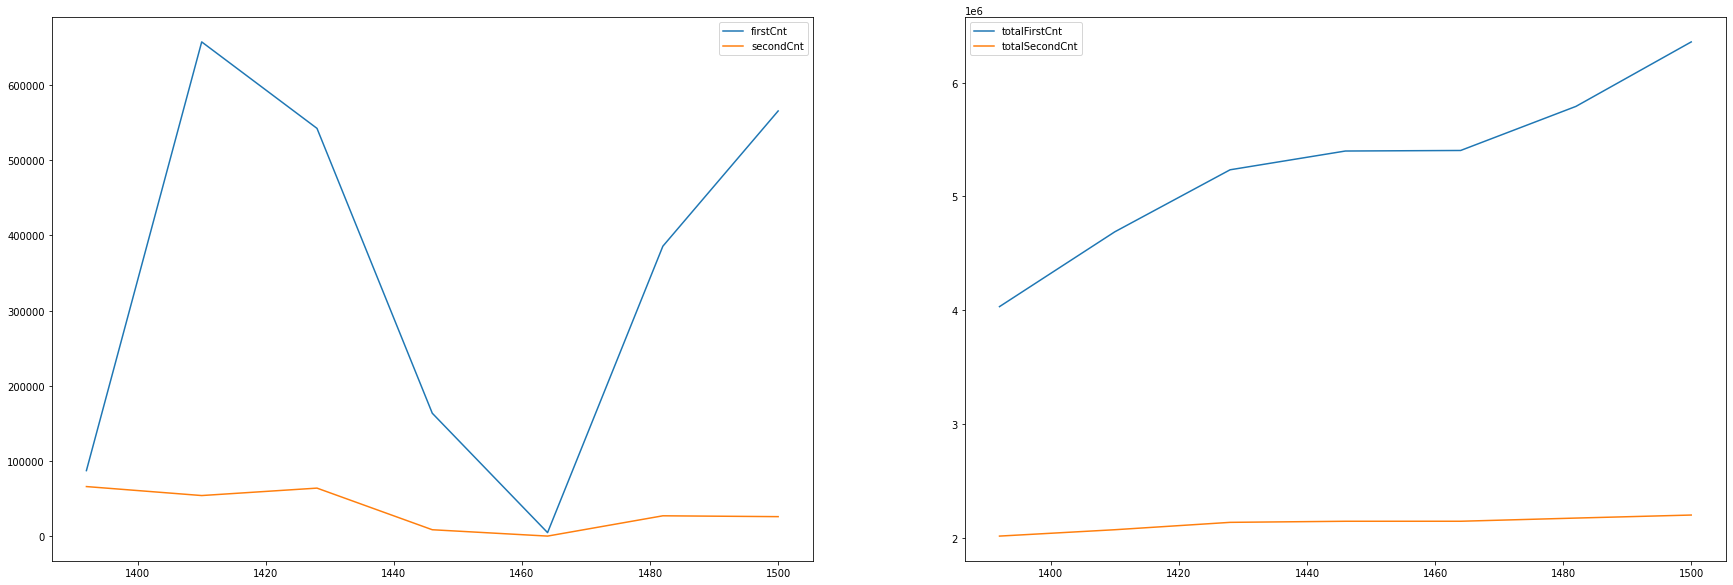

In [149]:
최근일주일전국df = df.query("sido == '전국'").tail(7)

fig,ax = plt.subplots(1,2,figsize = (30,10))

당일접종자df = 최근일주일전국df.filter(['firstCnt', 'secondCnt'])
당일접종자df.plot(ax = ax[0])

누적접종자df = 최근일주일전국df.filter(['totalFirstCnt', 'totalSecondCnt'])
누적접종자df.plot(ax = ax[1])


In [109]:
datetime = dt.datetime.now().strftime('%Y-%m-%d 00:00:00')
datetime
당일df = df.query("baseDate == @datetime").set_index('sido')

당일df = 당일df.drop('전국')
당일df

,accumulatedFirstCnt,accumulatedSecondCnt,baseDate,firstCnt,secondCnt,totalFirstCnt,totalSecondCnt
sido,,,,,,,
서울특별시,988706,333515,2021-06-02 00:00:00,103600,7109,1092306,340624
부산광역시,394247,129326,2021-06-02 00:00:00,44891,1507,439138,130833
대구광역시,235373,96888,2021-06-02 00:00:00,22868,1221,258241,98109
인천광역시,285867,102781,2021-06-02 00:00:00,28655,868,314522,103649
대전광역시,159034,59803,2021-06-02 00:00:00,14360,1013,173394,60816
광주광역시,177847,68420,2021-06-02 00:00:00,16806,795,194653,69215
울산광역시,99205,36183,2021-06-02 00:00:00,10701,122,109906,36305
세종특별자치시,29229,10475,2021-06-02 00:00:00,2247,42,31476,10517
강원도,226098,79992,2021-06-02 00:00:00,19585,1049,245683,81041


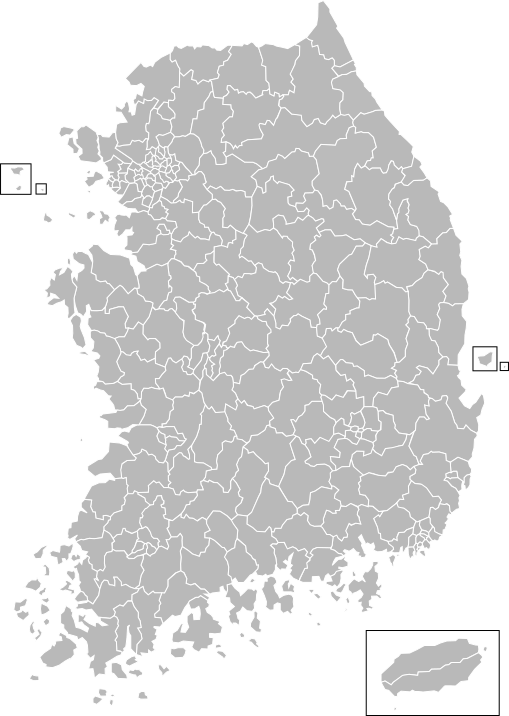

In [110]:
r = requests.get('http://itpaper.co.kr/data/map_korea.svg', headers=header_info)

# 결과 검사
if r.status_code != 200:
    # 에러코드와 에러메시지를 문자열로 구성
    err_msg = "%d %s 에러가 발생했습니다." % (r.status_code, r.reason)
    # 강제로 에러를 발생시킨다.
    raise Exception(err_msg)

map_svg = r.text
map_svg
    
SVG(map_svg)

In [132]:
soup = BeautifulSoup(map_svg)
soup

<?xml version="1.0" encoding="utf-8"?><!-- Generator: Adobe Illustrator 15.0.0, SVG Export Plug-In . SVG Version: 6.00 Build 0)  --><!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<html><body><svg enable-background="new 0 0 509 716.105" height="716.105px" id="Layer_1" version="1.1" viewbox="0 0 509 716.105" width="509px" x="0px" xml:space="preserve" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" y="0px">
<g id="서울특별시">
<path d="M171.5,167.272v2.167l1.167,1.25l-0.25,1.083l1.083,1.75l1.917,0.583
		l0.333-1.5l3.833-2.833l-0.333-2.5l-0.833-1.667l-3.667-0.333L171.5,167.272" fill="#B9B9B9" id="강동구" stroke="#FFFFFF"></path>
<path d="M171.5,169.439l-2.25,3.25l-3.333,0.417v2.5l2.833,2.25l1-0.083l0.667,1
		l1.167,0.917l1.25,2.5l3.75-4.583l-1.167-3v-0.5l-1.917-0.583l-0.917-1.917l0.083-0.917L171.5,169.439z" fill="#B9B9B9" id="송파구" stroke="#FFFFFF"></path>
<path d="M168.583,165.605l-1.5,0.25l-0.583,1.75l-1.25,3l-0.583

In [133]:
glist = soup.select("svg > g[id], svg > path[id]")

In [139]:
def save_svg(column, filename, colors):
    
    구간 = np.linspace(당일df[column].min(),당일df[column].max(), 6)


    for item in glist:
        # 지도의 id값(시도이름)이 dataframe의 index에 포함되어 있지 않다면 다음 조건으로 이동
        if item['id'] not in 당일df.index:
            continue

        count = 당일df.loc[ item['id'], column ]

        if count >= 구간[4] and count <= 구간[5]:   color_index = 4
        elif count >= 구간[3] and count < 구간[4]: color_index = 3
        elif count >= 구간[2] and count < 구간[3]: color_index = 2
        elif count >= 구간[1] and count < 구간[2]: color_index = 1
        else: color_index = 0


        # item에 fill 속성이 있는 경우 -> 세종특별자치시
        if 'fill' in item.attrs:
            item['fill'] = colors[color_index]
        # 그렇지 않은 경우 -> 나머지 지역
        else:
            # 현재 요소(item)의 하위 항목들에게 색상을 적용해야 한다.
            for p in item.select('path'):
                if 'fill' in p.attrs:
                    p['fill'] = colors[color_index]


    당일svg = soup.prettify()

    with open(filename, 'w', encoding="utf-8") as f:
        f.write(당일svg)

In [140]:
column_list = ['firstCnt', 'secondCnt', 'totalFirstCnt', 'totalSecondCnt']
colors = [['#eeeeFF', '#aaaaFF', '#8888FF', '#4444FF', '#0000FF'],
          ['#eeFFee', '#aaFFaa', '#88FF88', '#44FF44', '#00FF00'],
          ['#FFeeFF', '#FFaaFF', '#FF88FF', '#FF44FF', '#FF00FF'],
          ['#FFeeee', '#FFaaaa', '#FF8888', '#FF4444', '#FF0000']]
for i,v in enumerate(column_list):
    save_svg(v, '%s.svg' % v, colors[i])

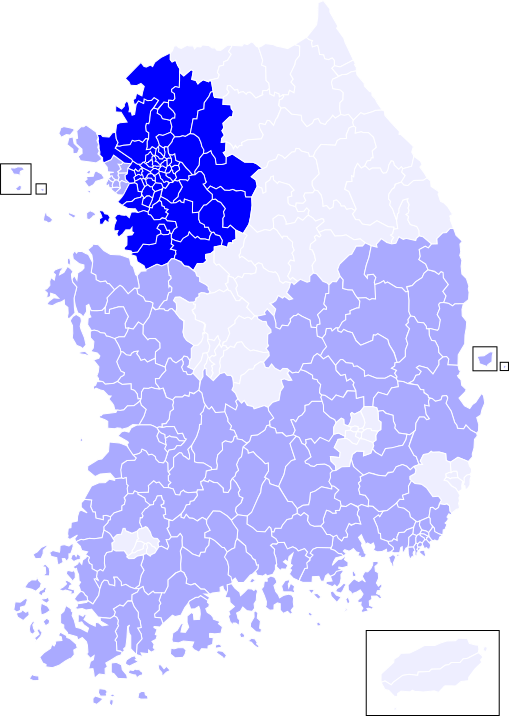

In [145]:
SVG('firstCnt.svg')

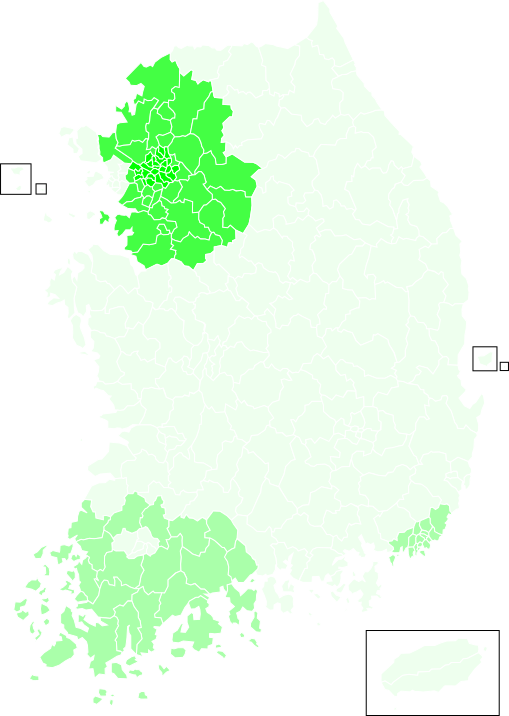

In [146]:
SVG('secondCnt.svg')

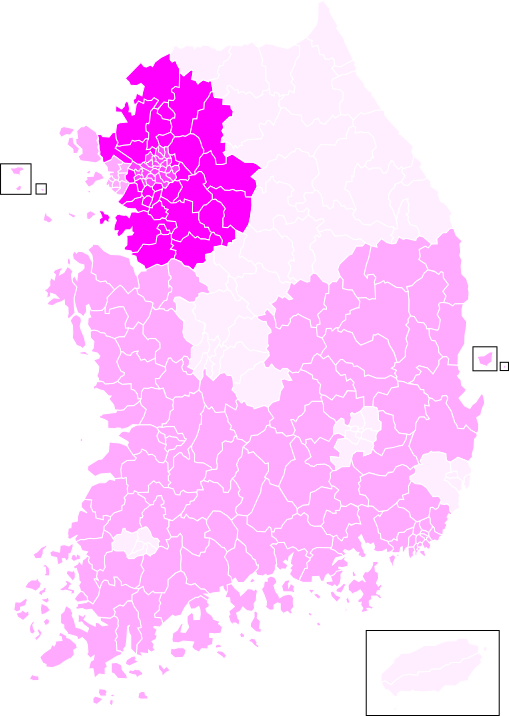

In [147]:
SVG('totalFirstCnt.svg')

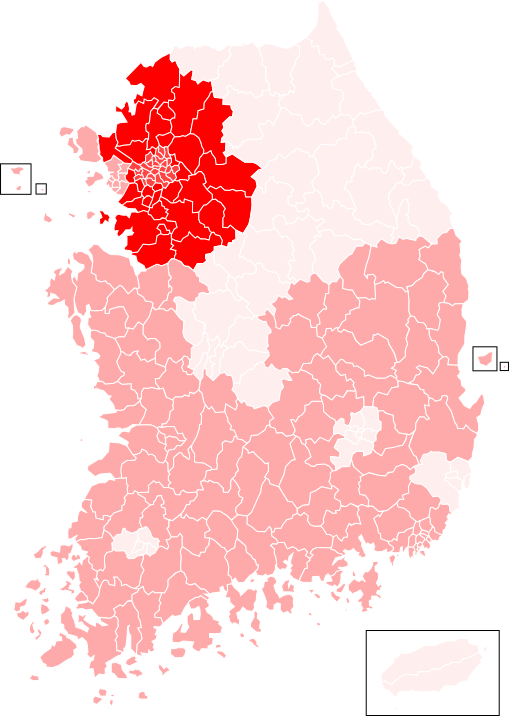

In [148]:
SVG('totalSecondCnt.svg')